In [1]:
import jax.numpy as np
from jax import random
from jax.scipy.special import expit
import matplotlib.pyplot as plt

from gcdyn.model import Model
from gcdyn.parameters import Parameters

pruning vs. not pruning with given parameters

In [2]:
seed = 0

# response function parameters
θ = np.array([3, 1, 0, 0], dtype=float)
# death rate
μ = 1
# mutation rate
m = 1
# sampling efficiency
ρ = 0.5

params = Parameters(θ, μ, m, ρ)

In [3]:
T = 3
n_trees = 10

model_no_prune = Model(params)
model_no_prune.simulate(T, n_trees, seed, False, 50, 96)
θ_inferred_no_prune = model_no_prune.fit()
print(θ_inferred_no_prune)

model_prune = Model(params)
model_prune.simulate(T, n_trees, seed, True, 50, 96)
θ_inferred_prune = model_prune.fit()
print(θ_inferred_prune)

initial objective 1.606651e+03
iteration 1000, objective 1.605e+03, relative change 3.556e-12                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
maximum iteration 1000 reached with relative change in objective function 3.6e-12
[ 2.70038175  1.32155432 -0.35630631  0.        ]
initial objective 2.714258e+03


2022-07-26 15:57:45.253333: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:62] 
********************************
[Compiling module jit_g.51] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2022-07-26 15:58:11.989452: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:131] The operation took 2m26.736316323s

********************************
[Compiling module jit_g.51] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


iteration 1000, objective 2.586e+03, relative change 2.310e-12               
maximum iteration 1000 reached with relative change in objective function 2.3e-12
[1.87957703 0.78882098 0.299561   0.        ]


In [4]:
def λ_(x: float, θ):
    r"""Birth rate of phenotype x

    Args:
        x: phenotype

    Returns:
        float: birth rate
    """
    return θ[0] * expit(θ[1] * (x - θ[2])) + θ[3]

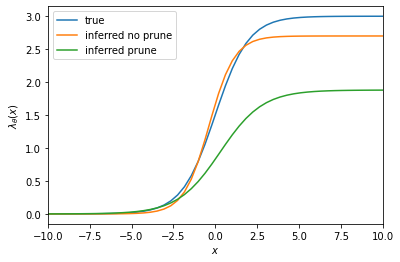

In [5]:
x_array = np.linspace(-10, 10)
plt.figure()
plt.plot(x_array, λ_(x_array, θ), label="true")
plt.plot(x_array, λ_(x_array, θ_inferred_no_prune), label="inferred no prune")
plt.plot(x_array, λ_(x_array, θ_inferred_prune), label="inferred prune")
plt.xlabel(r"$x$")
plt.ylabel(r"$\lambda_\theta(x)$")
plt.xlim(-10, 10)
plt.legend()
plt.show()

random starting condition

In [6]:
key = random.PRNGKey(seed)

θ_random = random.normal(key, shape=(4,))
print(θ_random)

params_random = Parameters(θ_random, μ, m, ρ)

[ 0.08086788 -0.38624702 -0.37565558  1.66897423]


In [7]:
T = 3
n_trees = 10

model_random_no_prune = Model(params_random)
model_random_no_prune.simulate(T, n_trees, seed, False, 50, 96)
θ_random_inferred_no_prune = model_random_no_prune.fit()
print(θ_random_inferred_no_prune)

model_random_prune = Model(params_random)
model_random_prune.simulate(T, n_trees, seed, True, 50, 96)
θ_random_inferred_prune = model_random_prune.fit()
print(θ_random_inferred_prune)

initial objective 1.786200e+03
iteration 1000, objective 1.782e+03, relative change 5.835e-10                                                       
maximum iteration 1000 reached with relative change in objective function 5.8e-10
[ 0.48805391 -8.44553207  1.2947459   1.4002521 ]
initial objective 3.285564e+03


2022-07-25 22:17:32.335330: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:62] 
********************************
[Compiling module jit_g.71] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2022-07-25 22:19:07.894835: E external/org_tensorflow/tensorflow/compiler/xla/service/slow_operation_alarm.cc:131] The operation took 3m35.559762577s

********************************
[Compiling module jit_g.71] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


iteration 1000, objective 3.168e+03, relative change 9.420e-08                                               
maximum iteration 1000 reached with relative change in objective function 9.4e-08
[ 0.30177914 10.50546034 -2.60011377  0.69164858]


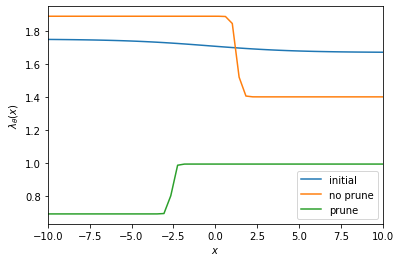

In [10]:
x_array = np.linspace(-10, 10)
plt.figure()
plt.plot(x_array, λ_(x_array, θ_random), label="initial")
plt.plot(x_array, λ_(x_array, θ_random_inferred_no_prune), label="no prune")
plt.plot(x_array, λ_(x_array, θ_random_inferred_prune), label="prune")
plt.xlabel(r"$x$")
plt.ylabel(r"$\lambda_\theta(x)$")
plt.xlim(-10, 10)
plt.legend()
plt.show()

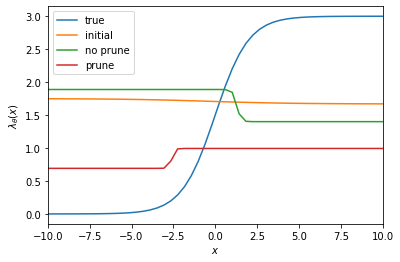

In [11]:
x_array = np.linspace(-10, 10)
plt.figure()
plt.plot(x_array, λ_(x_array, θ), label="true")
plt.plot(x_array, λ_(x_array, θ_random), label="initial")
plt.plot(x_array, λ_(x_array, θ_random_inferred_no_prune), label="no prune")
plt.plot(x_array, λ_(x_array, θ_random_inferred_prune), label="prune")
plt.xlabel(r"$x$")
plt.ylabel(r"$\lambda_\theta(x)$")
plt.xlim(-10, 10)
plt.legend()
plt.show()